In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm # linear regression OLS
from statsmodels.tsa.stattools import acf # auto correlation function
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.tsa.stattools import adfuller # test for random walk
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#import impyute as impy

In [209]:
train_features = pd.read_csv("dengue_features_train.csv")
train_labels = pd.read_csv("dengue_labels_train.csv")
data_final_test = pd.read_csv("dengue_features_test.csv")

In [3]:
train_labelsSj = train_labels[train_labels['city']=='sj']
train_labelsIq = train_labels[train_labels['city']=='iq']

In [184]:
train_featuresSj = train_features[train_features['city']=='sj']
train_featuresIq = train_features[train_features['city']=='iq']

In [210]:
colunas=nantrue.columns
colunas=colunas.drop(['city','week_start_date','year'])
colunas;

In [60]:
colunas=nantrue.columns
colunas=colunas.drop(['city','week_start_date'])
colunas;

In [211]:
semanas=train_features['weekofyear'].unique()
mediasSj=pd.DataFrame(columns=colunas)
mediasIq=pd.DataFrame(columns=colunas)

mediasSj['weekofyear']=semanas
mediasSj.index=mediasSj['weekofyear']

mediasIq['weekofyear']=semanas
mediasIq.index=mediasIq['weekofyear']
#medias

In [ ]:
#Sjfeatures=Sjfeatures.apply(lambda x: x.fillna(x.mean()),axis=0)
#Iqfeatures=Iqfeatures.apply(lambda x: x.fillna(x.mean()),axis=0)

In [212]:
for i in semanas:
    #print(i)
    for j in colunas:
        mediasSj.loc[i,j]=np.average(train_featuresSj[train_featuresSj['weekofyear']==i][j].dropna())
        
for i in semanas:
    #print(i)
    for j in colunas:
        mediasIq.loc[i,j]=np.average(train_featuresIq[train_featuresIq['weekofyear']==i][j].dropna())
        

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [226]:
mediasSj.loc[53]=mediasSj.loc[52]
mediasSj.loc[53,'weekofyear']=52

mediasIq.loc[53]=mediasIq.loc[52]
mediasIq.loc[53,'weekofyear']=52

In [11]:
#mediasIq

In [122]:
#train_featuresSj[train_featuresSj['weekofyear']==53]

In [15]:
#train_features=train_features.drop([139,451,763,1170,1430])

In [16]:
#train_featuresSj=train_featuresSj.drop([139,451,763])

In [17]:
#train_featuresIq=train_featuresIq.drop([1170,1430])

In [106]:
#train_labelsSj.loc[451]

In [12]:
#train_features.columns

In [13]:
week=[]
year=[]
for i in range(0, len(train_featuresSj)):
     week.append(str(train_featuresSj['weekofyear'].iloc[i]))
     year.append(str(train_featuresSj['year'].iloc[i]))   
week[1]


data=[]
for i in range(0, len(train_featuresSj)):
    data.append(year[i] +' '+week[i]  )


train_featuresSj['data']= data

for i in range(0, len(train_featuresSj)):
    train_featuresSj['data'].iloc[i]=datetime.strptime(train_featuresSj['data'].iloc[i] + ' 0', "%Y %W %w")


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
week=[]
year=[]
for i in range(0, len(train_featuresIq)):
     week.append(str(train_featuresIq['weekofyear'].iloc[i]))
     year.append(str(train_featuresIq['year'].iloc[i]))   
week[1]


data=[]
for i in range(0, len(train_featuresIq)):
    data.append(year[i] +' '+week[i]  )


train_featuresIq['data']= data

for i in range(0, len(train_featuresIq)):
    train_featuresIq['data'].iloc[i]=datetime.strptime(train_featuresIq['data'].iloc[i] + ' 0', "%Y %W %w")



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
#train_featuresSj.index=train_featuresSj['data']
#train_featuresIq.index=train_featuresIq['data']
#train_featuresSj

In [30]:
colunas[3]


'ndvi_sw'

In [27]:
#para fazer a imputacao
#r=3
#BIC = np.zeros(shape=(len(colunas),r,r))
#AIC = np.zeros(shape=(len(colunas),r,r))
#k=0
#for j in colunas:
#    k=k+1
#    print(k)
#    for p in range(r):
#        for q in range(r):
#            mod = ARMA(train_featuresSj[j].dropna(), order=(p,q))
#            res = mod.fit()  
#            BIC[k][p][q] = res.bic
#            AIC[k][p][q] = res.aic
            

In [16]:
#for j in colunas:
 #   print(train_featuresSj[j])

In [15]:
#for i in range(0, len(train_featuresIq)):
 #   train_featuresIq['data'].iloc[i]=datetime.strptime(train_featuresIq['data'].iloc[i] + ' 0', "%Y %W %w")


#train_featuresIq['data']

In [30]:
mediasIq;

In [213]:
print(nantrue.columns)
print(len(nantrue))
#nantrue[]
nantrue['city'].iloc[31]

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')
1456


False

In [33]:
mediasSj.loc[18]['ndvi_ne']

0.08244556

In [105]:
nantrue['weekofyear'];

In [54]:
from statsmodels.tsa.arima_model import ARMA

In [16]:
#a = np.array(train_featuresSj['ndvi_se'], dtype=np.float64)
#Sj=Sj.tolist()



#mod = ARMA(a, order=(1,0),)

#res = mod.fit()

#print(res.summary())




In [ ]:
for j in colunas:
    
    mod = ARMA(train_featuresSj[j].dropna(), order=(p,q))
    res = mod.fit()  


In [17]:
train_featuresSj;

In [221]:
colunas=colunas.drop('weekofyear')

In [31]:
len(nantrue['weekofyear'])
len(nantrue['weekofyear'].dropna())

1456

In [186]:
train_featuresT=train_features

In [219]:
nantrue=train_featuresT.isna()
nantrue.drop(columns='weekofyear')
nantrue['weekofyear']=train_featuresT['weekofyear']
nantrue['year']=train_featuresT['year']
nantrue['city']=train_featuresT['city']
nantrue;

In [225]:
indicesnan

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0
1,451.0,451.0,451.0,451.0,451.0,451.0,451.0,451.0,451.0,451.0,451.0,451.0,451.0,451.0,451.0,451.0,451.0,451.0,451.0,451.0
2,763.0,763.0,763.0,763.0,763.0,763.0,763.0,763.0,763.0,763.0,763.0,763.0,763.0,763.0,763.0,763.0,763.0,763.0,763.0,763.0
3,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0
4,1430.0,1430.0,1430.0,1430.0,1430.0,1430.0,1430.0,1430.0,1430.0,1430.0,1430.0,1430.0,1430.0,1430.0,1430.0,1430.0,1430.0,1430.0,1430.0,1430.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
indicesnan=pd.DataFrame()

In [224]:






for j in colunas:
    indices=[]
    for i in nantrue.index:
        if nantrue[j].loc[i]:
            #print(i)
            indices.append(i)
    indicesnan[j]=pd.Series(indices)
    
#print(len(indices))
#print(indices)

In [216]:
nantrue0=train_features.isna()
for j in colunas:
    k=0
    for i in range(0,len(nantrue0)):
        if nantrue0[j].iloc[i]:
            k=k+1
    print(j,' total de nans é', k)

weekofyear  total de nans é 0
ndvi_ne  total de nans é 194
ndvi_nw  total de nans é 52
ndvi_se  total de nans é 22
ndvi_sw  total de nans é 22
precipitation_amt_mm  total de nans é 13
reanalysis_air_temp_k  total de nans é 10
reanalysis_avg_temp_k  total de nans é 10
reanalysis_dew_point_temp_k  total de nans é 10
reanalysis_max_air_temp_k  total de nans é 10
reanalysis_min_air_temp_k  total de nans é 10
reanalysis_precip_amt_kg_per_m2  total de nans é 10
reanalysis_relative_humidity_percent  total de nans é 10
reanalysis_sat_precip_amt_mm  total de nans é 13
reanalysis_specific_humidity_g_per_kg  total de nans é 10
reanalysis_tdtr_k  total de nans é 10
station_avg_temp_c  total de nans é 43
station_diur_temp_rng_c  total de nans é 43
station_max_temp_c  total de nans é 20
station_min_temp_c  total de nans é 14
station_precip_mm  total de nans é 22


In [217]:
train_featuresT=train_features

In [323]:
nantrue=train_featuresT.isna()
for j in colunas:
    k=0
    for i in range(0,len(nantrue)):
        if nantrue[j].iloc[i]:
            k=k+1
    print(j,' total de nans é', k)



ndvi_ne  total de nans é 0
ndvi_nw  total de nans é 0
ndvi_se  total de nans é 0
ndvi_sw  total de nans é 0
precipitation_amt_mm  total de nans é 0
reanalysis_air_temp_k  total de nans é 0
reanalysis_avg_temp_k  total de nans é 0
reanalysis_dew_point_temp_k  total de nans é 0
reanalysis_max_air_temp_k  total de nans é 0
reanalysis_min_air_temp_k  total de nans é 0
reanalysis_precip_amt_kg_per_m2  total de nans é 0
reanalysis_relative_humidity_percent  total de nans é 0
reanalysis_sat_precip_amt_mm  total de nans é 0
reanalysis_specific_humidity_g_per_kg  total de nans é 0
reanalysis_tdtr_k  total de nans é 0
station_avg_temp_c  total de nans é 0
station_diur_temp_rng_c  total de nans é 0
station_max_temp_c  total de nans é 0
station_min_temp_c  total de nans é 0
station_precip_mm  total de nans é 0


In [227]:
for j in colunas:
    for i in range(0,len(indicesnan[j])):
        print(i)
        if indicesnan[j].isna()[i]:
            continue
        elif train_featuresT.loc[indicesnan[j].iloc[i],'city'] == 'sj':    
        #    print(indicesnan[j].iloc[i])
            train_featuresT.loc[indicesnan[j].iloc[i],j]= mediasSj.loc[train_featuresT.loc[indicesnan[j].iloc[i]]['weekofyear']][j]
        #[train_featuresT.loc[indicesnan['ndvi_ne'].iloc[10]]['weekofyear' ]]
        else:
         #   print('imptIq')
            train_featuresT.loc[indicesnan[j].iloc[i],j]= mediasIq.loc[train_featuresT.loc[indicesnan[j].iloc[i]]['weekofyear']][j]





0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110


51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146

In [328]:
train_featuresT.to_csv('CleanTrainFeatures1.csv', index=False)

In [100]:
train_featuresT.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [327]:
data_final_test.to_csv('CleanFinalTest1.csv',index=False)

In [196]:
#train_featuresT=train_featuresT.drop([139,451,763,1170,1430]);

In [26]:
#train_featuresT.loc[indicesnan['ndvi_ne'].iloc[10]]

In [27]:
#indicesnan

In [28]:
#testi

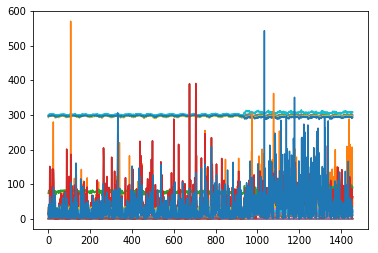

In [30]:
for j in colunas:
    #print(j)
    plt.plot(train_featuresT[j])
    

In [229]:
train_featuresTsj=train_featuresT[train_featuresT['city']=='sj']
train_featuresTiq=train_featuresT[train_featuresT['city']=='iq']

train_labelsTsj=train_labels[train_labels['city']=='sj']
train_labelsTiq=train_labels[train_labels['city']=='iq']

In [232]:
train_featuresT

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42000,297.572857,...,32.00000,73.365714,12.42000,14.012857,2.628571,25.442857,6.900000,29.4000,20.0000,16.000000
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82000,298.211429,...,17.94000,77.368571,22.82000,15.372857,2.371429,26.714286,6.371429,31.7000,22.2000,8.600000
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54000,298.781429,...,26.10000,82.052857,34.54000,16.848571,2.300000,26.714286,6.485714,32.2000,22.8000,41.400000
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36000,298.987143,...,13.90000,80.337143,15.36000,16.672857,2.428571,27.471429,6.771429,33.3000,23.3000,4.000000
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52000,299.518571,...,12.20000,80.460000,7.52000,17.210000,3.014286,28.942857,9.371429,35.0000,23.9000,5.800000
5,sj,1990,23,1990-06-04,0.055656,0.174850,0.254314,0.181743,9.58000,299.630000,...,26.49000,79.891429,9.58000,17.212857,2.100000,28.114286,6.942857,34.4000,23.9000,39.100000
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48000,299.207143,...,38.60000,82.000000,3.48000,17.234286,2.042857,27.414286,6.771429,32.2000,23.3000,29.700000
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12000,299.591429,...,30.00000,83.375714,151.12000,17.977143,1.571429,28.371429,7.685714,33.9000,22.8000,21.100000
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32000,299.578571,...,37.51000,82.768571,19.32000,17.790000,1.885714,28.328571,7.385714,33.9000,22.8000,21.100000
9,sj,1990,27,1990-07-02,0.075280,0.121550,0.160683,0.202567,14.41000,300.154286,...,28.40000,81.281429,14.41000,18.071429,2.014286,28.328571,6.514286,33.9000,24.4000,1.100000


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


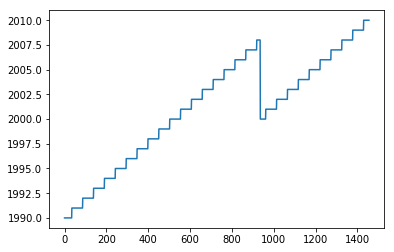

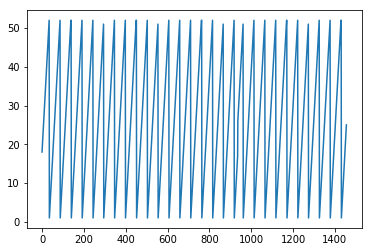

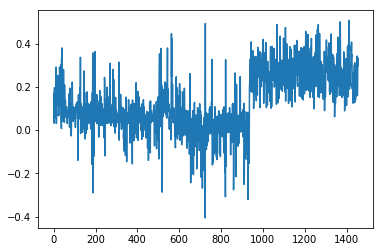

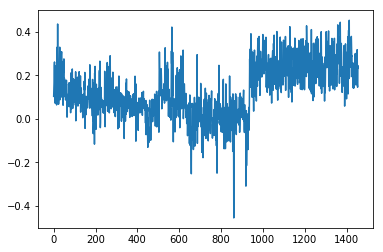

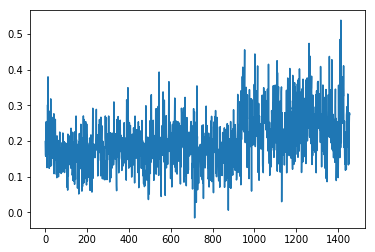

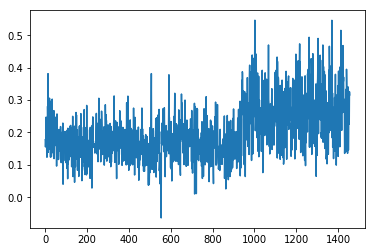

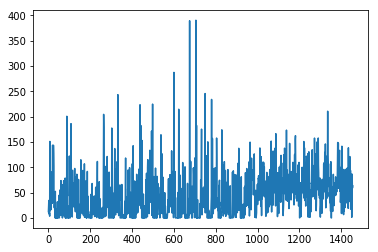

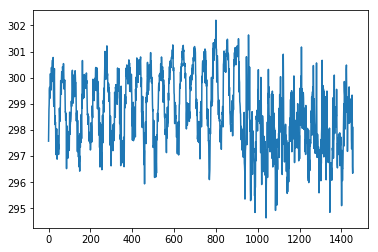

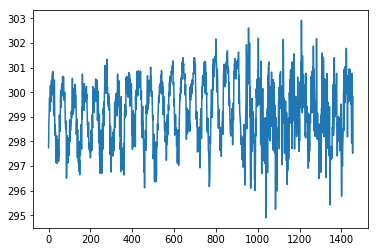

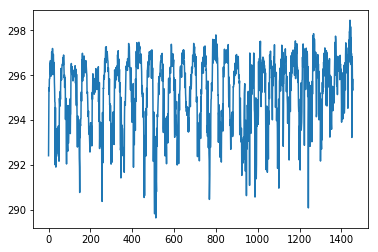

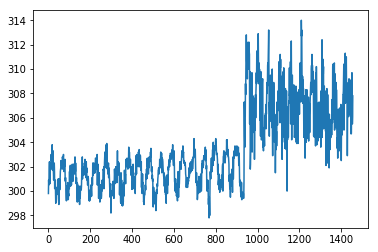

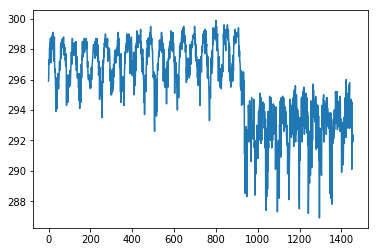

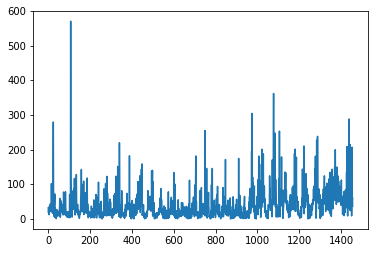

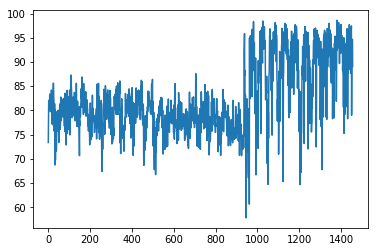

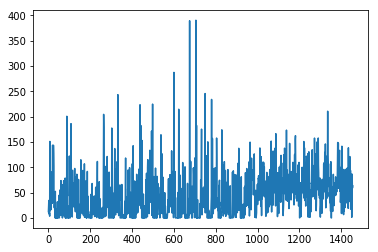

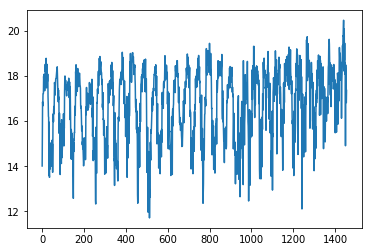

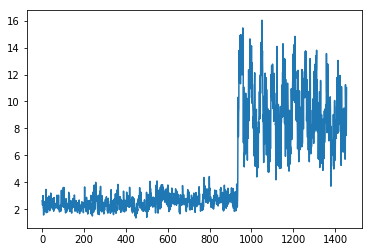

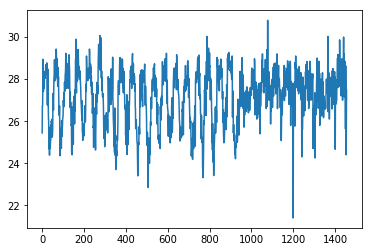

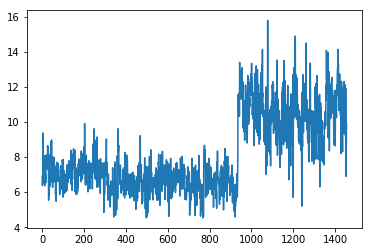

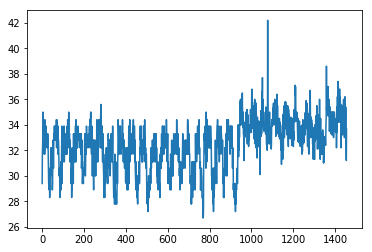

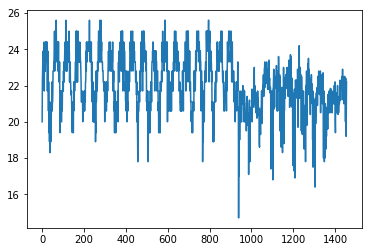

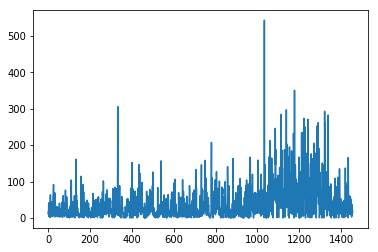

In [62]:
for j in colunas:
    #print(j)
    plt.figure()
    plt.plot(train_features[j])
    

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


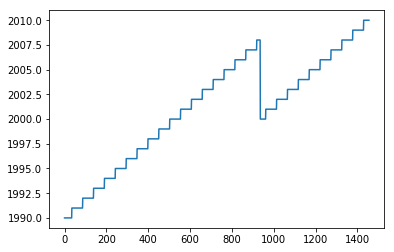

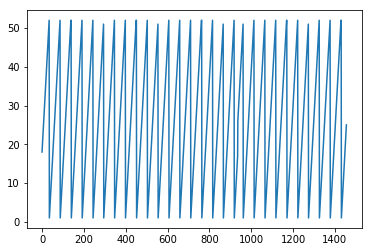

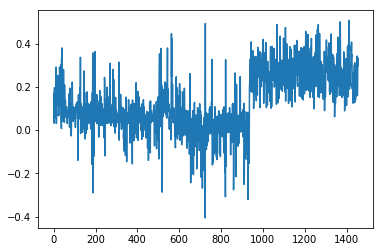

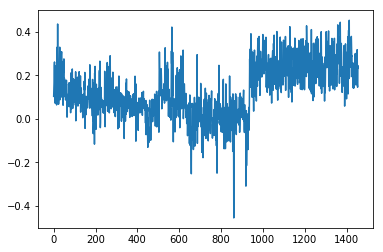

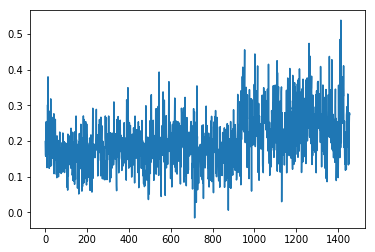

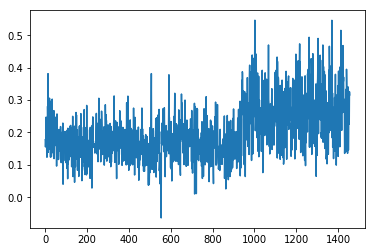

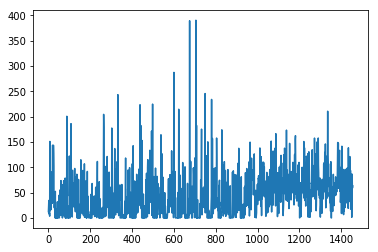

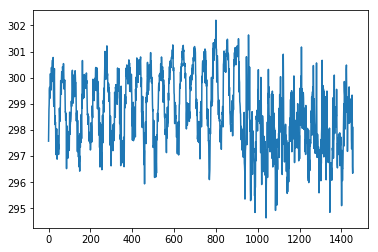

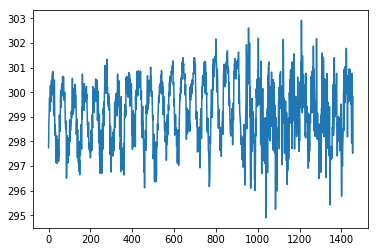

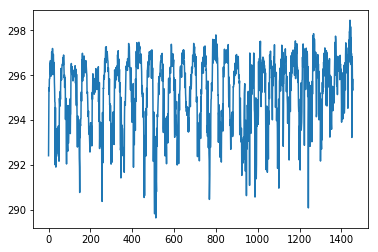

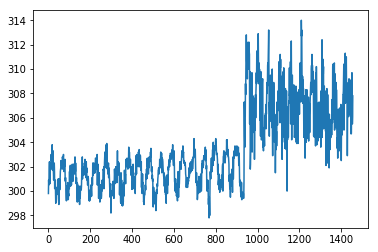

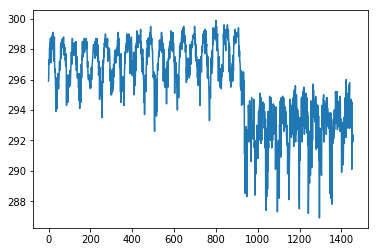

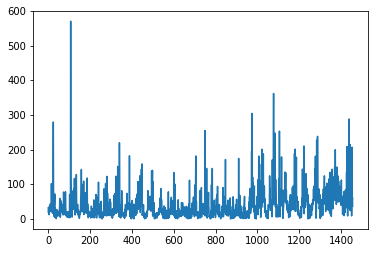

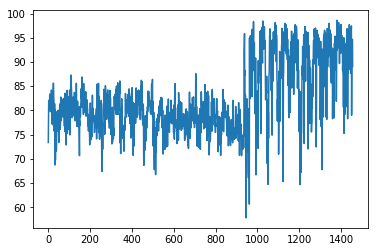

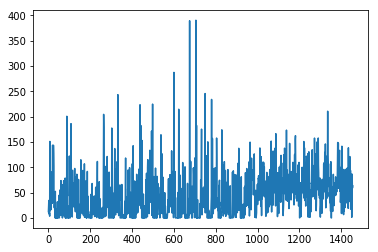

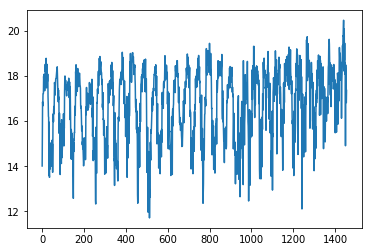

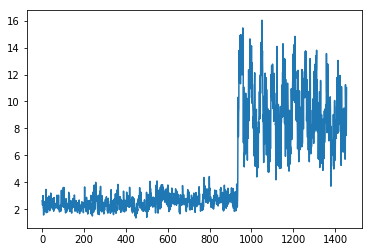

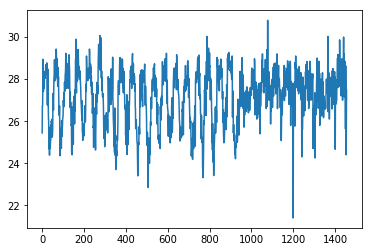

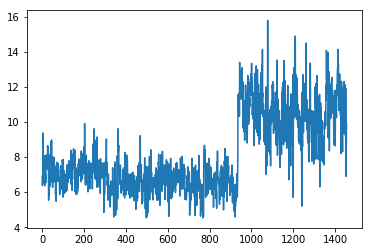

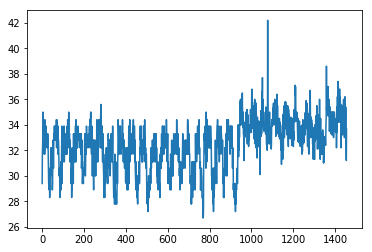

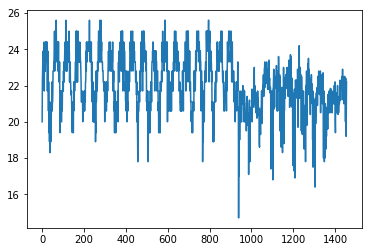

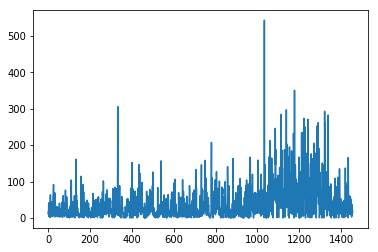

In [63]:
for j in colunas:
    #print(j)
    plt.figure()
    plt.plot(train_featuresT[j],label='t')
    

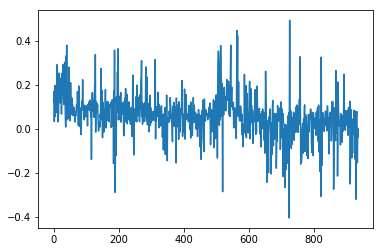

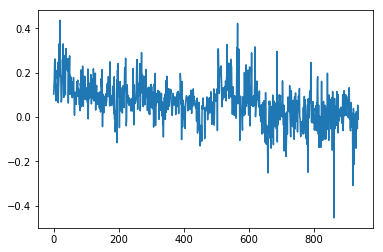

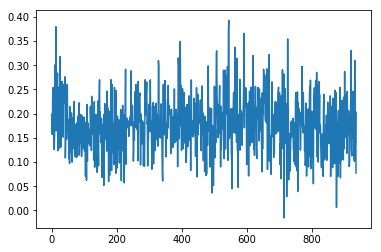

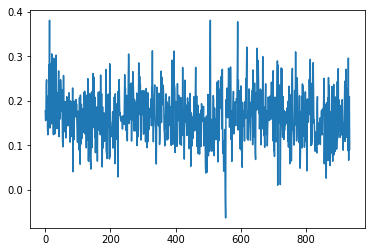

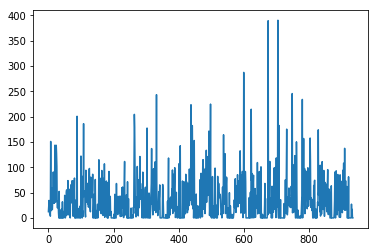

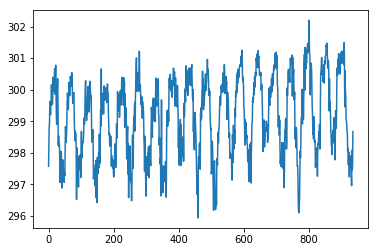

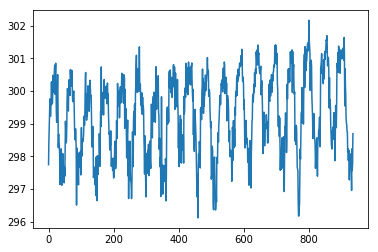

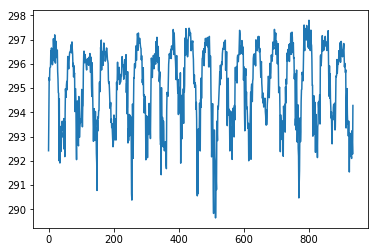

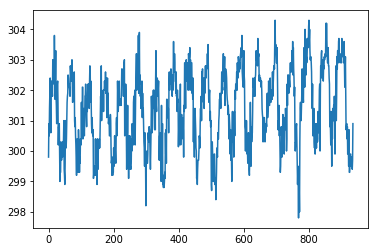

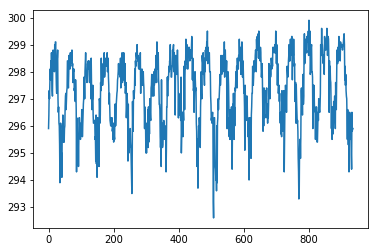

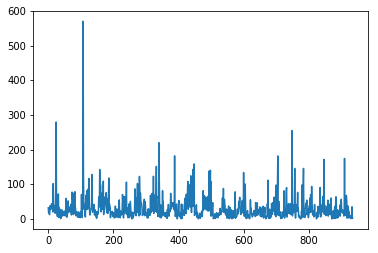

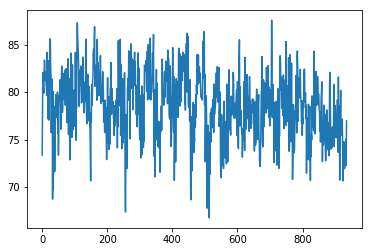

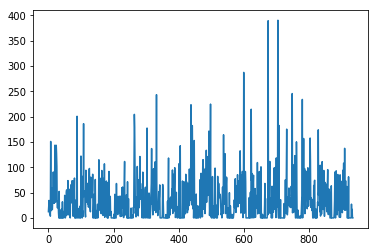

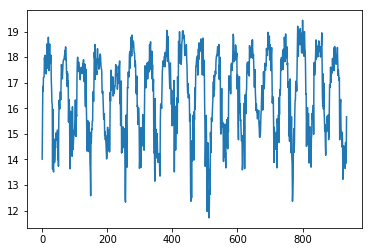

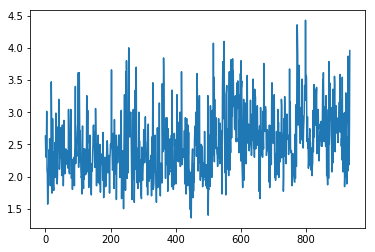

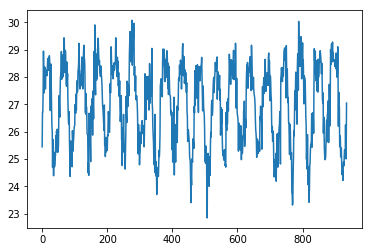

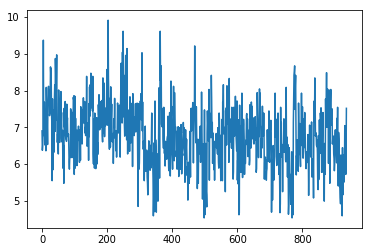

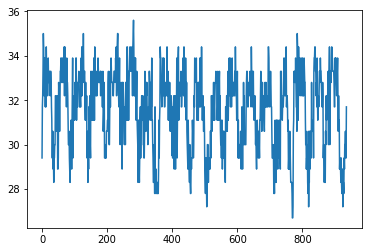

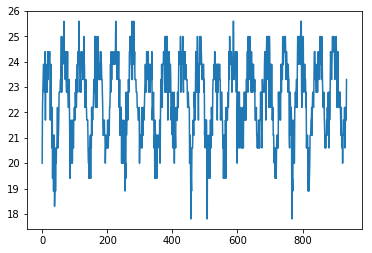

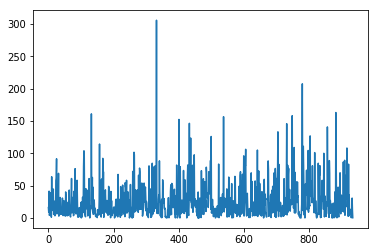

In [61]:
for j in colunas:
    #print(j)
    plt.figure()
    plt.plot(train_featuresTsj[j],label='t')
    

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


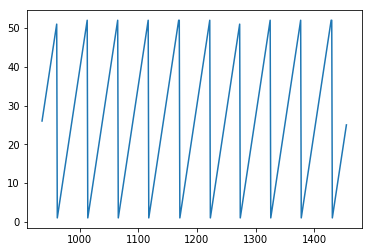

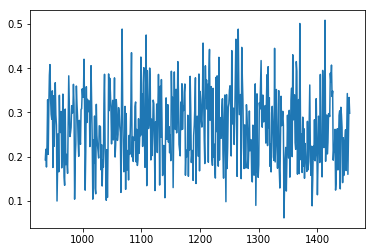

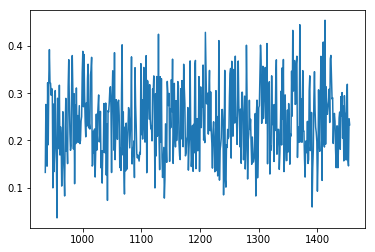

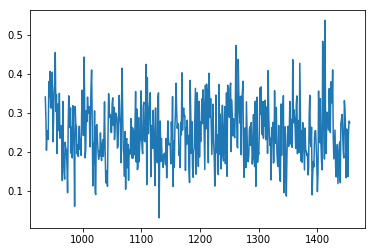

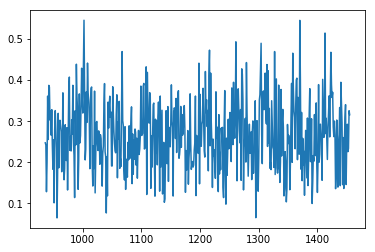

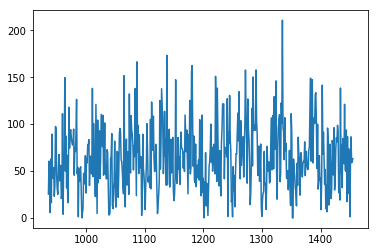

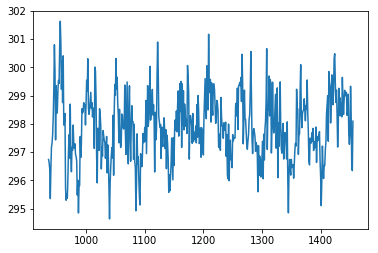

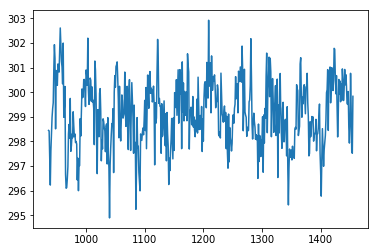

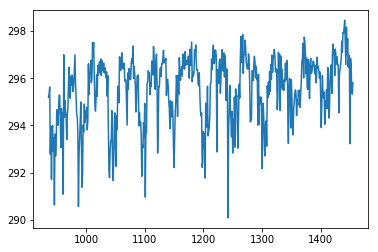

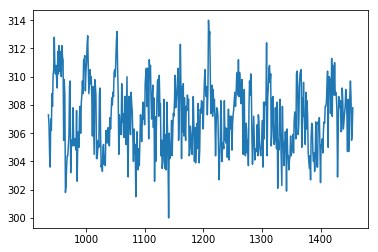

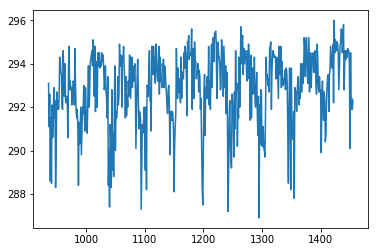

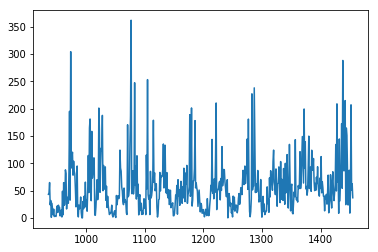

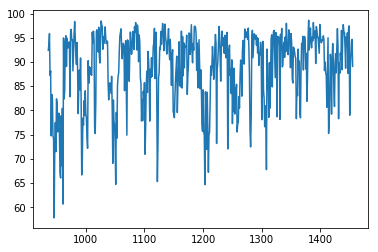

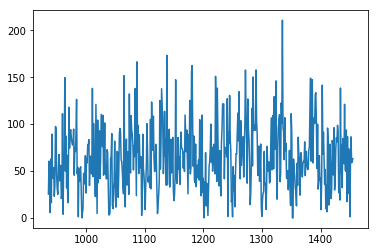

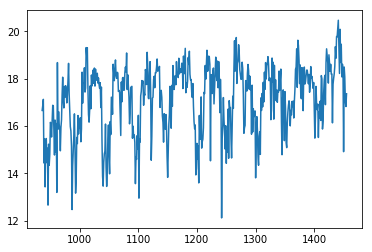

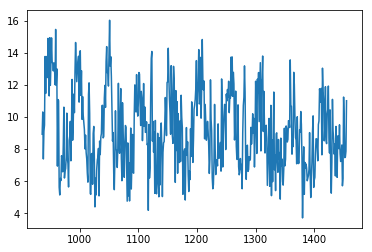

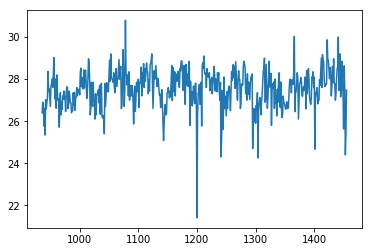

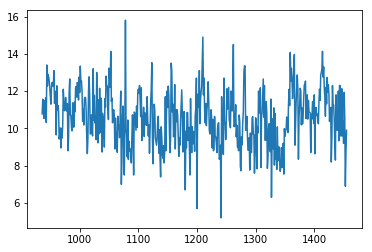

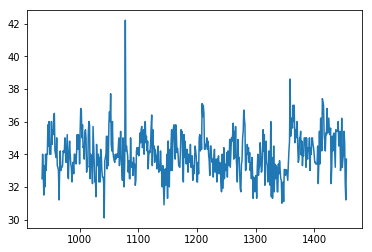

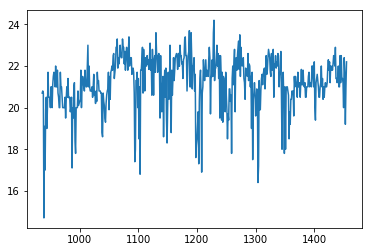

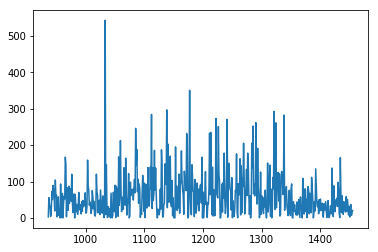

In [34]:
for j in colunas:
    #print(j)
    plt.figure()
    plt.plot(train_featuresTiq[j],label='t')
    

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [74]:
#train_featuresTiq=train_featuresTiq.drop(columns='week_start_date')
#train_featuresTsj=train_featuresTsj.drop(columns='week_start_date')
train_featuresTiq=train_featuresTiq.drop(columns='city')
train_featuresTsj=train_featuresTsj.drop(columns='city')

In [76]:
scaleriq = StandardScaler()

scalersj = StandardScaler()

scaleriq.fit(train_featuresTiq)

scalersj.fit(train_featuresTsj)

stdXiq = scaleriq.transform(train_featuresTiq[colunas])
stdXsj = scalersj.transform(train_featuresTsj[colunas])

In [67]:
modelo = PCA()

scaler = StandardScaler()


pcaiq = PCA()
pcasj = PCA()

pipelineiq = make_pipeline(scaler,pcaiq)

pipelineiq.fit(train_featuresTiq[colunas])

pipelinesj = make_pipeline(scaler,pcasj)

pipelinesj.fit(train_featuresTsj[colunas])




Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

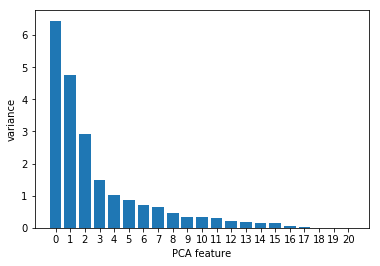

In [37]:
features = range(pcaiq.n_components_)
plt.bar(features, pcaiq.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

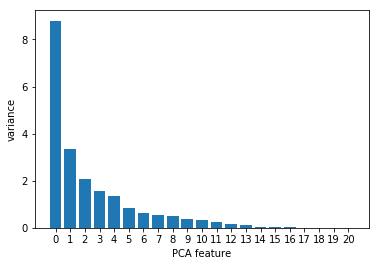

In [38]:
features = range(pcasj.n_components_)
plt.bar(features, pcasj.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [96]:
testy=train_featuresT.isnull()

for i in range

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [112]:
matrix_Wsj= pcasj.components_[0:9].T
matrix_Wiq= pcaiq.components_.T[0:9].T

In [113]:
# AQUI CHEGANDO NAS COMPONENTES TRANSFORMADAS
#
# stdXiq 
# stdXsj

Ysj = stdXsj.dot(matrix_Wsj)
Yiq = stdXiq.dot(matrix_Wiq)

In [114]:
pcasj.singular_values_

array([9.06979626e+01, 5.58702161e+01, 4.73173359e+01, 3.96631556e+01,
       3.71559545e+01, 2.94686697e+01, 2.49865499e+01, 2.31846468e+01,
       2.20374333e+01, 1.92276236e+01, 1.83384968e+01, 1.62095932e+01,
       1.38506228e+01, 1.22943475e+01, 1.04173359e+01, 7.08933943e+00,
       6.05998621e+00, 4.95122684e+00, 1.68937811e+00, 1.06791260e+00,
       2.74151444e-01, 6.49265481e-15])

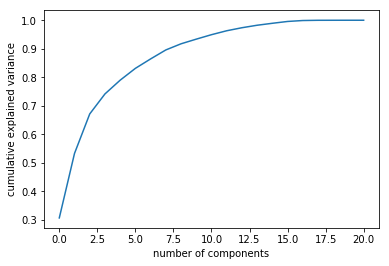

In [39]:
plt.plot(np.cumsum(pcaiq.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

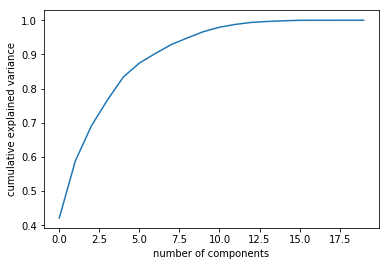

In [88]:
plt.plot(np.cumsum(pcasj.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [115]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn.tree import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split



In [233]:
train_featuresTsj.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [243]:
#benchmark SANJUAN




y = train_labelsSj['total_cases']



X = train_featuresTsj.drop(columns=['week_start_date','city'])

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)


modelo = DecisionTreeRegressor()
# ajusta o modelo
modelo.fit(train_X, train_y)

# pega previsoes a partir do modelo
previsoes = modelo.predict(val_X)
print(mean_absolute_error(val_y, previsoes))




19.05128205128205


In [118]:
#benchmark SANJUAN

y = train_labelsSj['total_cases']

X = Ysj

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)


modelo = DecisionTreeRegressor()
# ajusta o modelo
modelo.fit(train_X, train_y)

# pega previsoes a partir do modelo
previsoes = modelo.predict(val_X)
print(mean_absolute_error(val_y, previsoes))





32.76923076923077


In [156]:
print(train_featuresTsj.columns)
train_featuresTsj=train_featuresTsj.drop(columns=['week_start_date','city'])


Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')


In [158]:
train_featuresTiq=train_featuresTiq.drop(columns=['week_start_date','city'])

In [241]:
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.tree import mean_absolute_error
#from sklearn.metrics import mean_absolute_error
#from sklearn.model_selection import train_test_split

y = train_labelsSj['total_cases']



X = train_featuresTsj

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)


modelo = DecisionTreeRegressor()
# ajusta o modelo
modelo.fit(train_X, train_y)

# pega previsoes a partir do modelo
previsoes = modelo.predict(val_X)
print(mean_absolute_error(val_y, previsoes))



ValueError: could not convert string to float: '2003-06-25'

In [244]:
forest_modelSj= RandomForestRegressor(n_estimators=1000, max_leaf_nodes=100000)
forest_modelSj.fit(train_X, train_y)
totalcases = forest_modelSj.predict(val_X)
print(mean_absolute_error(val_y,totalcases))

16.156179487179486


In [145]:
def get_mae(max_folhas, preditores_treino, preditores_val,alvo_treino, alvo_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_folhas, random_state=0)
    model.fit(preditores_treino, alvo_treino)
    preds_val = model.predict(preditores_val)
    mae = mean_absolute_error( alvo_val, preds_val)
    return(mae)

In [130]:
for max_folhas in range(2,100):
    my_mae = get_mae(max_folhas, train_X, val_X, train_y, val_y)
    print("Maximo numero de folhas: %d  \t\t Mean Absolute Error:  %d" %(max_folhas, my_mae))
    #50 foi o melhor!

Maximo numero de folhas: 2  		 Mean Absolute Error:  26
Maximo numero de folhas: 3  		 Mean Absolute Error:  24
Maximo numero de folhas: 4  		 Mean Absolute Error:  20
Maximo numero de folhas: 5  		 Mean Absolute Error:  21
Maximo numero de folhas: 6  		 Mean Absolute Error:  21
Maximo numero de folhas: 7  		 Mean Absolute Error:  20
Maximo numero de folhas: 8  		 Mean Absolute Error:  20
Maximo numero de folhas: 9  		 Mean Absolute Error:  20
Maximo numero de folhas: 10  		 Mean Absolute Error:  21
Maximo numero de folhas: 11  		 Mean Absolute Error:  21
Maximo numero de folhas: 12  		 Mean Absolute Error:  20
Maximo numero de folhas: 13  		 Mean Absolute Error:  20
Maximo numero de folhas: 14  		 Mean Absolute Error:  19
Maximo numero de folhas: 15  		 Mean Absolute Error:  20
Maximo numero de folhas: 16  		 Mean Absolute Error:  20
Maximo numero de folhas: 17  		 Mean Absolute Error:  19
Maximo numero de folhas: 18  		 Mean Absolute Error:  19
Maximo numero de folhas: 19  		 Mean Ab

In [131]:
from sklearn.ensemble import RandomForestRegressor

In [240]:
forest_modelIq= RandomForestRegressor(n_estimators=1000, max_leaf_nodes=10000)
forest_modelIq.fit(train_X, train_y)
totalcases = forest_modelSq.predict(val_X)
print(mean_absolute_error(val_y,totalcases))

5.899630769230769


In [238]:
#benchmark IQUITOS



y = train_labelsIq['total_cases']



X = train_featuresTiq.drop(columns=['week_start_date','city'])

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)


modelo = DecisionTreeRegressor()
# ajusta o modelo
modelo.fit(train_X, train_y)

# pega previsoes a partir do modelo
previsoes = modelo.predict(val_X)
print(mean_absolute_error(val_y, previsoes))



8.176923076923076


In [138]:
forest_modelIq= RandomForestRegressor(n_estimators=1000, max_leaf_nodes=100000)
forest_modelIq.fit(train_X, train_y)
totalcases = forest_modelIq.predict(val_X)
print(mean_absolute_error(val_y,totalcases))

5.87463076923077


In [139]:
len(train_labelsSj)

936

In [140]:
len(train_featuresSj)

936

In [157]:

yiq = train_labelsIq['total_cases']



Xiq = train_featuresTiq


forest_modelIq= RandomForestRegressor(n_estimators=1000, max_leaf_nodes=100000)
forest_modelIq.fit(Xiq, yiq)


ysj = train_labelsSj['total_cases']



Xsj = train_featuresTsj


forest_modelSj= RandomForestRegressor(n_estimators=1000, max_leaf_nodes=100000)
forest_modelSj.fit(Xsj, ysj)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=100000,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [151]:
train_labelsSj

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [155]:
data_final_testsj=data_final_test[data_final_test['city']=='sj']
data_final_testiq=data_final_test[data_final_test['city']=='iq']

In [161]:
subSj=forest_modelIq.predict(data_final_testsj.drop(columns=['week_start_date','city']))

subIq=forest_modelSj.predict(data_final_testiq.drop(columns=['week_start_date','city']))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [162]:
data_final_testsj.drop(columns=['week_start_date','city'])

data_final_testiq.drop(columns=['week_start_date','city'])

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,2008,18,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,2008,19,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,2008,20,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,2008,21,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,2008,22,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
5,2008,23,-0.044000,-0.030467,0.132000,0.083529,71.17,299.768571,299.728571,295.314286,...,22.55,76.557143,71.17,16.667143,2.857143,28.000000,5.171429,32.8,25.0,27.7
6,2008,24,-0.044300,-0.024925,0.132271,0.159157,48.99,300.062857,300.007143,295.650000,...,13.10,76.844286,48.99,17.010000,3.157143,27.400000,6.042857,31.1,23.3,91.7
7,2008,25,NaN,0.082150,0.144371,0.116729,30.81,300.484286,300.578571,295.997143,...,7.20,76.870000,30.81,17.420000,3.900000,28.757143,6.985714,34.4,24.4,0.3
8,2008,26,0.010800,0.049900,0.100571,0.117329,8.02,300.601429,300.621429,296.268571,...,17.10,77.395714,8.02,17.678571,2.785714,28.657143,6.242857,32.8,23.9,28.7
9,2008,27,0.072667,0.106660,0.155429,0.164900,17.52,300.497143,300.528571,296.411429,...,11.90,78.534286,17.52,17.808571,2.228571,28.457143,4.628571,31.1,25.0,2.9


In [164]:
data_final_testT=data_final_test

In [325]:
nantruet=data_final_test.isna()
nantruet.drop(columns='weekofyear')
nantruet['weekofyear']=data_final_test['weekofyear']
nantruet['year']=data_final_test['year']
nantruet['city']=data_final_test['city']
nantruet;

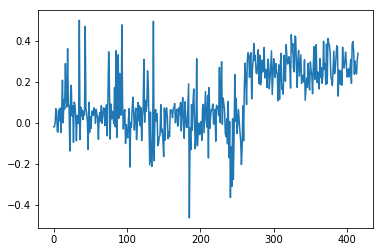

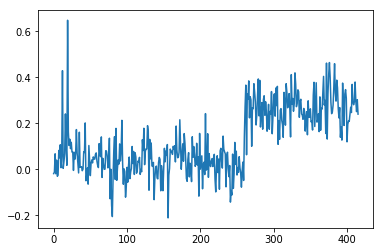

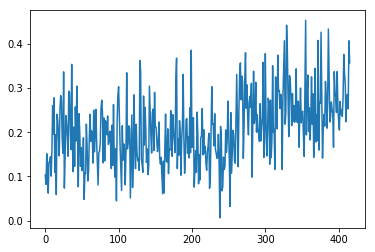

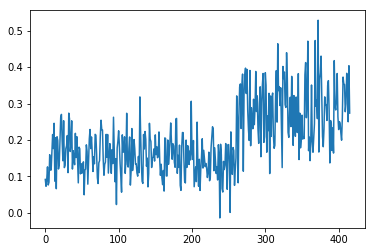

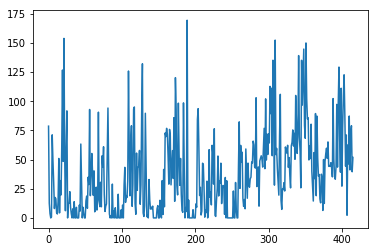

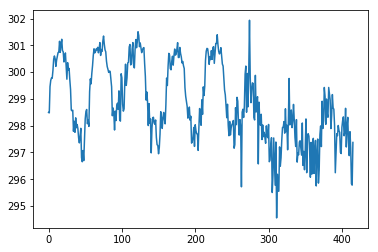

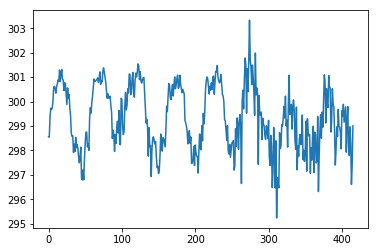

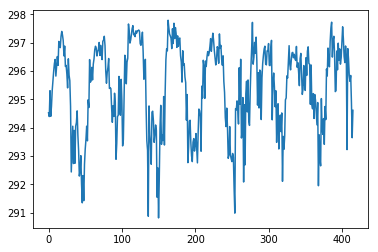

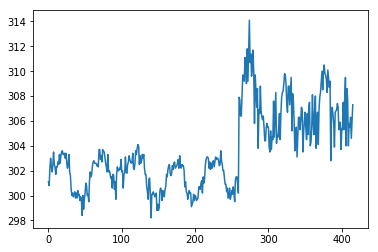

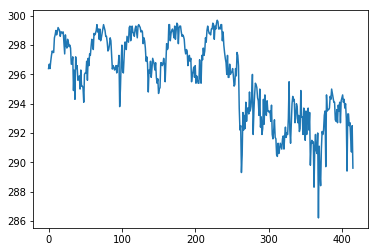

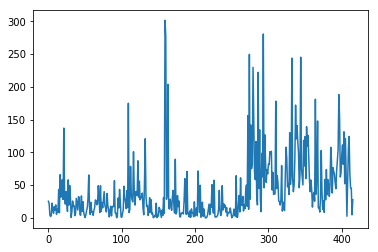

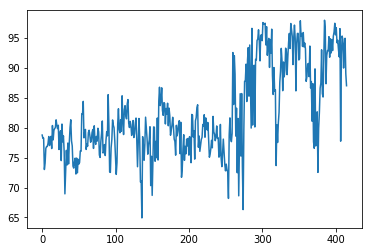

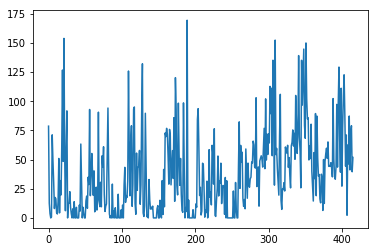

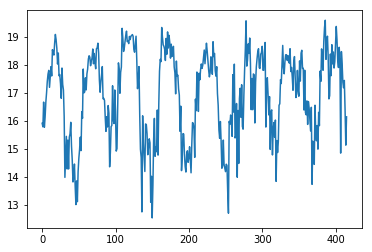

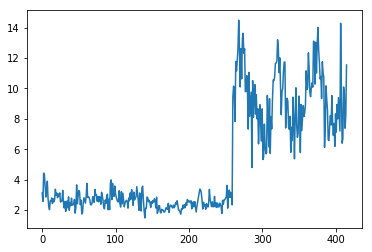

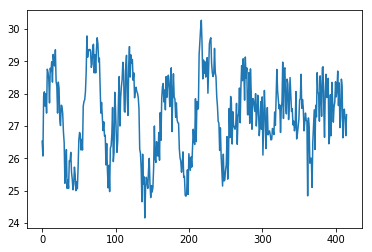

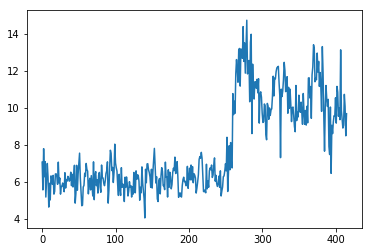

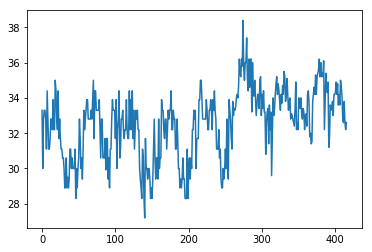

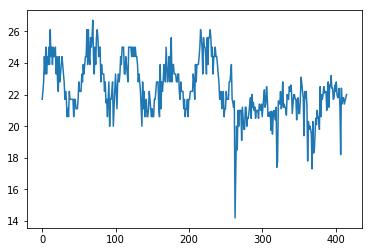

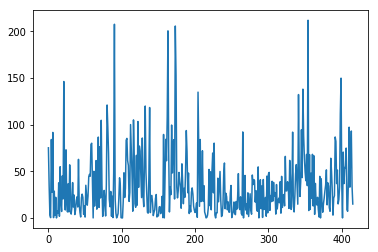

In [182]:
for j in colunas:
    #print(j)
    plt.figure()
    plt.plot(data_final_test[j],label='t')
    

In [326]:
for j in colunas:
    k=0
    for i in range(0,len(nantruet)):
        if nantruet[j].iloc[i]:
            k=k+1
    print(j,' total de nans é', k)

ndvi_ne  total de nans é 0
ndvi_nw  total de nans é 0
ndvi_se  total de nans é 0
ndvi_sw  total de nans é 0
precipitation_amt_mm  total de nans é 0
reanalysis_air_temp_k  total de nans é 0
reanalysis_avg_temp_k  total de nans é 0
reanalysis_dew_point_temp_k  total de nans é 0
reanalysis_max_air_temp_k  total de nans é 0
reanalysis_min_air_temp_k  total de nans é 0
reanalysis_precip_amt_kg_per_m2  total de nans é 0
reanalysis_relative_humidity_percent  total de nans é 0
reanalysis_sat_precip_amt_mm  total de nans é 0
reanalysis_specific_humidity_g_per_kg  total de nans é 0
reanalysis_tdtr_k  total de nans é 0
station_avg_temp_c  total de nans é 0
station_diur_temp_rng_c  total de nans é 0
station_max_temp_c  total de nans é 0
station_min_temp_c  total de nans é 0
station_precip_mm  total de nans é 0


In [175]:
colunas=colunas.drop('weekofyear')
colunas

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [250]:
for j in colunas:
    for i in range(0,len(indicesnant[j])):
        print(i)
        if indicesnant[j].isna()[i]:
            continue
        elif data_final_test.loc[indicesnant[j].iloc[i],'city'] == 'sj':    
        #    print(indicesnan[j].iloc[i])
            data_final_test.loc[indicesnant[j].iloc[i],j]= mediasSj.loc[data_final_test.loc[indicesnant[j].iloc[i]]['weekofyear']][j]
        #[train_featuresT.loc[indicesnan['ndvi_ne'].iloc[10]]['weekofyear' ]]
        else:
         #   print('imptIq')
            data_final_test.loc[indicesnant[j].iloc[i],j]= mediasIq.loc[data_final_test.loc[indicesnant[j].iloc[i]]['weekofyear']][j]





0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
13

223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
7

331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
19

In [170]:


indicesnant=pd.DataFrame()

for j in colunas:
    indices=[]
    for i in nantruet.index:
        if nantruet[j].loc[i]:
            #print(i)
            indices.append(i)
    indicesnant[j]=pd.Series(indices)
    
#print(len(indices))
#print(indices)

In [245]:
data_final_test.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [253]:
data_final_testSj=data_final_test[data_final_test['city']=='sj']
data_final_testIq=data_final_test[data_final_test['city']=='iq']

In [254]:
subSj=forest_modelIq.predict(data_final_testSj.drop(columns=['week_start_date','city']))

subIq=forest_modelSj.predict(data_final_testIq.drop(columns=['week_start_date','city']))

In [312]:
fimp1=pd.Series(subSj)
fimp2=pd.Series(subIq)
fimp1.index = s1.index
fimp2.index = s2.index

In [313]:
fimp=pd.concat([fimp1, fimp2], axis=0)

In [316]:
len(finis)

416

In [315]:
finis=round(fimp)

In [317]:
finis=finis.astype('int64')


In [318]:
len(finis)

416

In [307]:
SubMission=pd.DataFrame()

In [270]:
SJ=data_final_testSj['city']
IQ=data_final_testIq['city']

cf=pd.concat([SJ, IQ], axis=0)

In [273]:
s1=data_final_testSj['weekofyear'];
y1=data_final_testSj['year'];

In [274]:
s2=data_final_testIq['weekofyear'];
y2=data_final_testIq['year'];

In [275]:
weekf=pd.concat([s1, s2], axis=0)
yearf=pd.concat([y1, y2], axis=0)


In [293]:
fimp2=fimp

for i in range(0,len(fimp)):
    fimp2.iloc[i]=int(round(fimp.iloc[i]))

In [296]:
fimp

0        7.0
1       13.0
2        6.0
3       12.0
4        6.0
5       13.0
6       13.0
7        6.0
8       14.0
9       14.0
10      13.0
11      13.0
12      14.0
13      14.0
14      13.0
15      14.0
16      13.0
17      13.0
18      13.0
19      13.0
20      13.0
21      14.0
22      11.0
23      19.0
24      18.0
25      17.0
26      20.0
27      20.0
28      20.0
29      20.0
       ...  
386    130.0
387    132.0
388    105.0
389    108.0
390     34.0
391     24.0
392     23.0
393     22.0
394     20.0
395     30.0
396     19.0
397     20.0
398     16.0
399     15.0
400     22.0
401     39.0
402     23.0
403     24.0
404     12.0
405     19.0
406     13.0
407     51.0
408     16.0
409     13.0
410     13.0
411     12.0
412     13.0
413     13.0
414     13.0
415     12.0
Length: 416, dtype: float64

In [311]:
len(fimp)

676

In [319]:
SubMission['city']=cf
SubMission['year']=yearf
SubMission['weekofyear']=weekf
SubMission['total_cases']=finis

In [320]:
SubMission

,city,year,weekofyear,total_cases
0,sj,2008,18,7
1,sj,2008,19,14
2,sj,2008,20,7
3,sj,2008,21,13
4,sj,2008,22,7
5,sj,2008,23,13
6,sj,2008,24,13
7,sj,2008,25,7
8,sj,2008,26,14
9,sj,2008,27,15


In [321]:
SubMission.to_csv('Take1.csv', index=False)